# Assignment 1 - Data Collection and Analysis

## Objective

In this assignment, you as a class will collectively record a dataset with elevator arrival times on the ground floor in CDS.
Using this dataset, you will determine the best location to wait in order to minimize the expected walking distance to the next arriving elevator.

Learning goals:

- Practice collecting, interacting, and visualizing data.
- Practice making a hypothesis based on training data and then evaluating it on test data.

This assignment will be graded on a scale of full credit, partial credit, or no credit. You will get full credit if you collected data, proposed a reasonable location to wait for elevators at, and tested the proposed location on the data to see that it works. The questions are meant to guide you.

# Part 1: Data Collection (9/16 - 9/19)

For this homework, we will collect a dataset with elevator arrival times on the ground floor of CDS as a class.
 - We will use data from Mon 9/16 - Tue 9/17 as training data.
 - We will use data from Wed 9/18 - Thu 9/19 as test data.

To receive credit for this part, you should sign up for a 5 minute slot between 10-5pm on one of your assigned days. The assignment is by first name:
 - If your first name begins with A-N, please sign up for a 5-minute slot on Monday OR Tuesday.
 - If your first name begins with O-Z, please sign up for a 5-minute slot on Wednesday OR Thursday.

You cannot sign up for a slot that has already been taken.
[link to signup sheet](https://docs.google.com/spreadsheets/d/1RhYg51l02JTOEng71JC-4k1oPgTbd25ScAMqvcwDvuU/edit?usp=sharing).

During your assigned time slot, you should observe near the elevators on the ground floor (lobby level) of CDS and
fill in [this Google form](https://docs.google.com/forms/d/e/1FAIpQLSe72Ln_2ZeXiTxfr2r0QI3FLF5wdcXMka_1aZg2RhmQekmXEw/viewform?vc=0&c=0&w=1&flr=0&usp=mail_form_link) with the ID of the elevator when it arrives.
 In other words, when an elevator
door opens, select the elevator ID and submit the form. The timestamp will automatically be recorded. You must be signed in using your BU email to complete the form.

The responses to the Google form are recorded in [this Google spreadsheet](https://docs.google.com/spreadsheets/d/1VepMqIvBq-_oqa1a4RXY7SlLz2GtK4DpJLnBnA7GKOU/edit?usp=sharing), which you all have read access to. You must be signed in using your BU email to access the data.

Please use the following diagram to determine the elevator ID. (units expressed in meters)

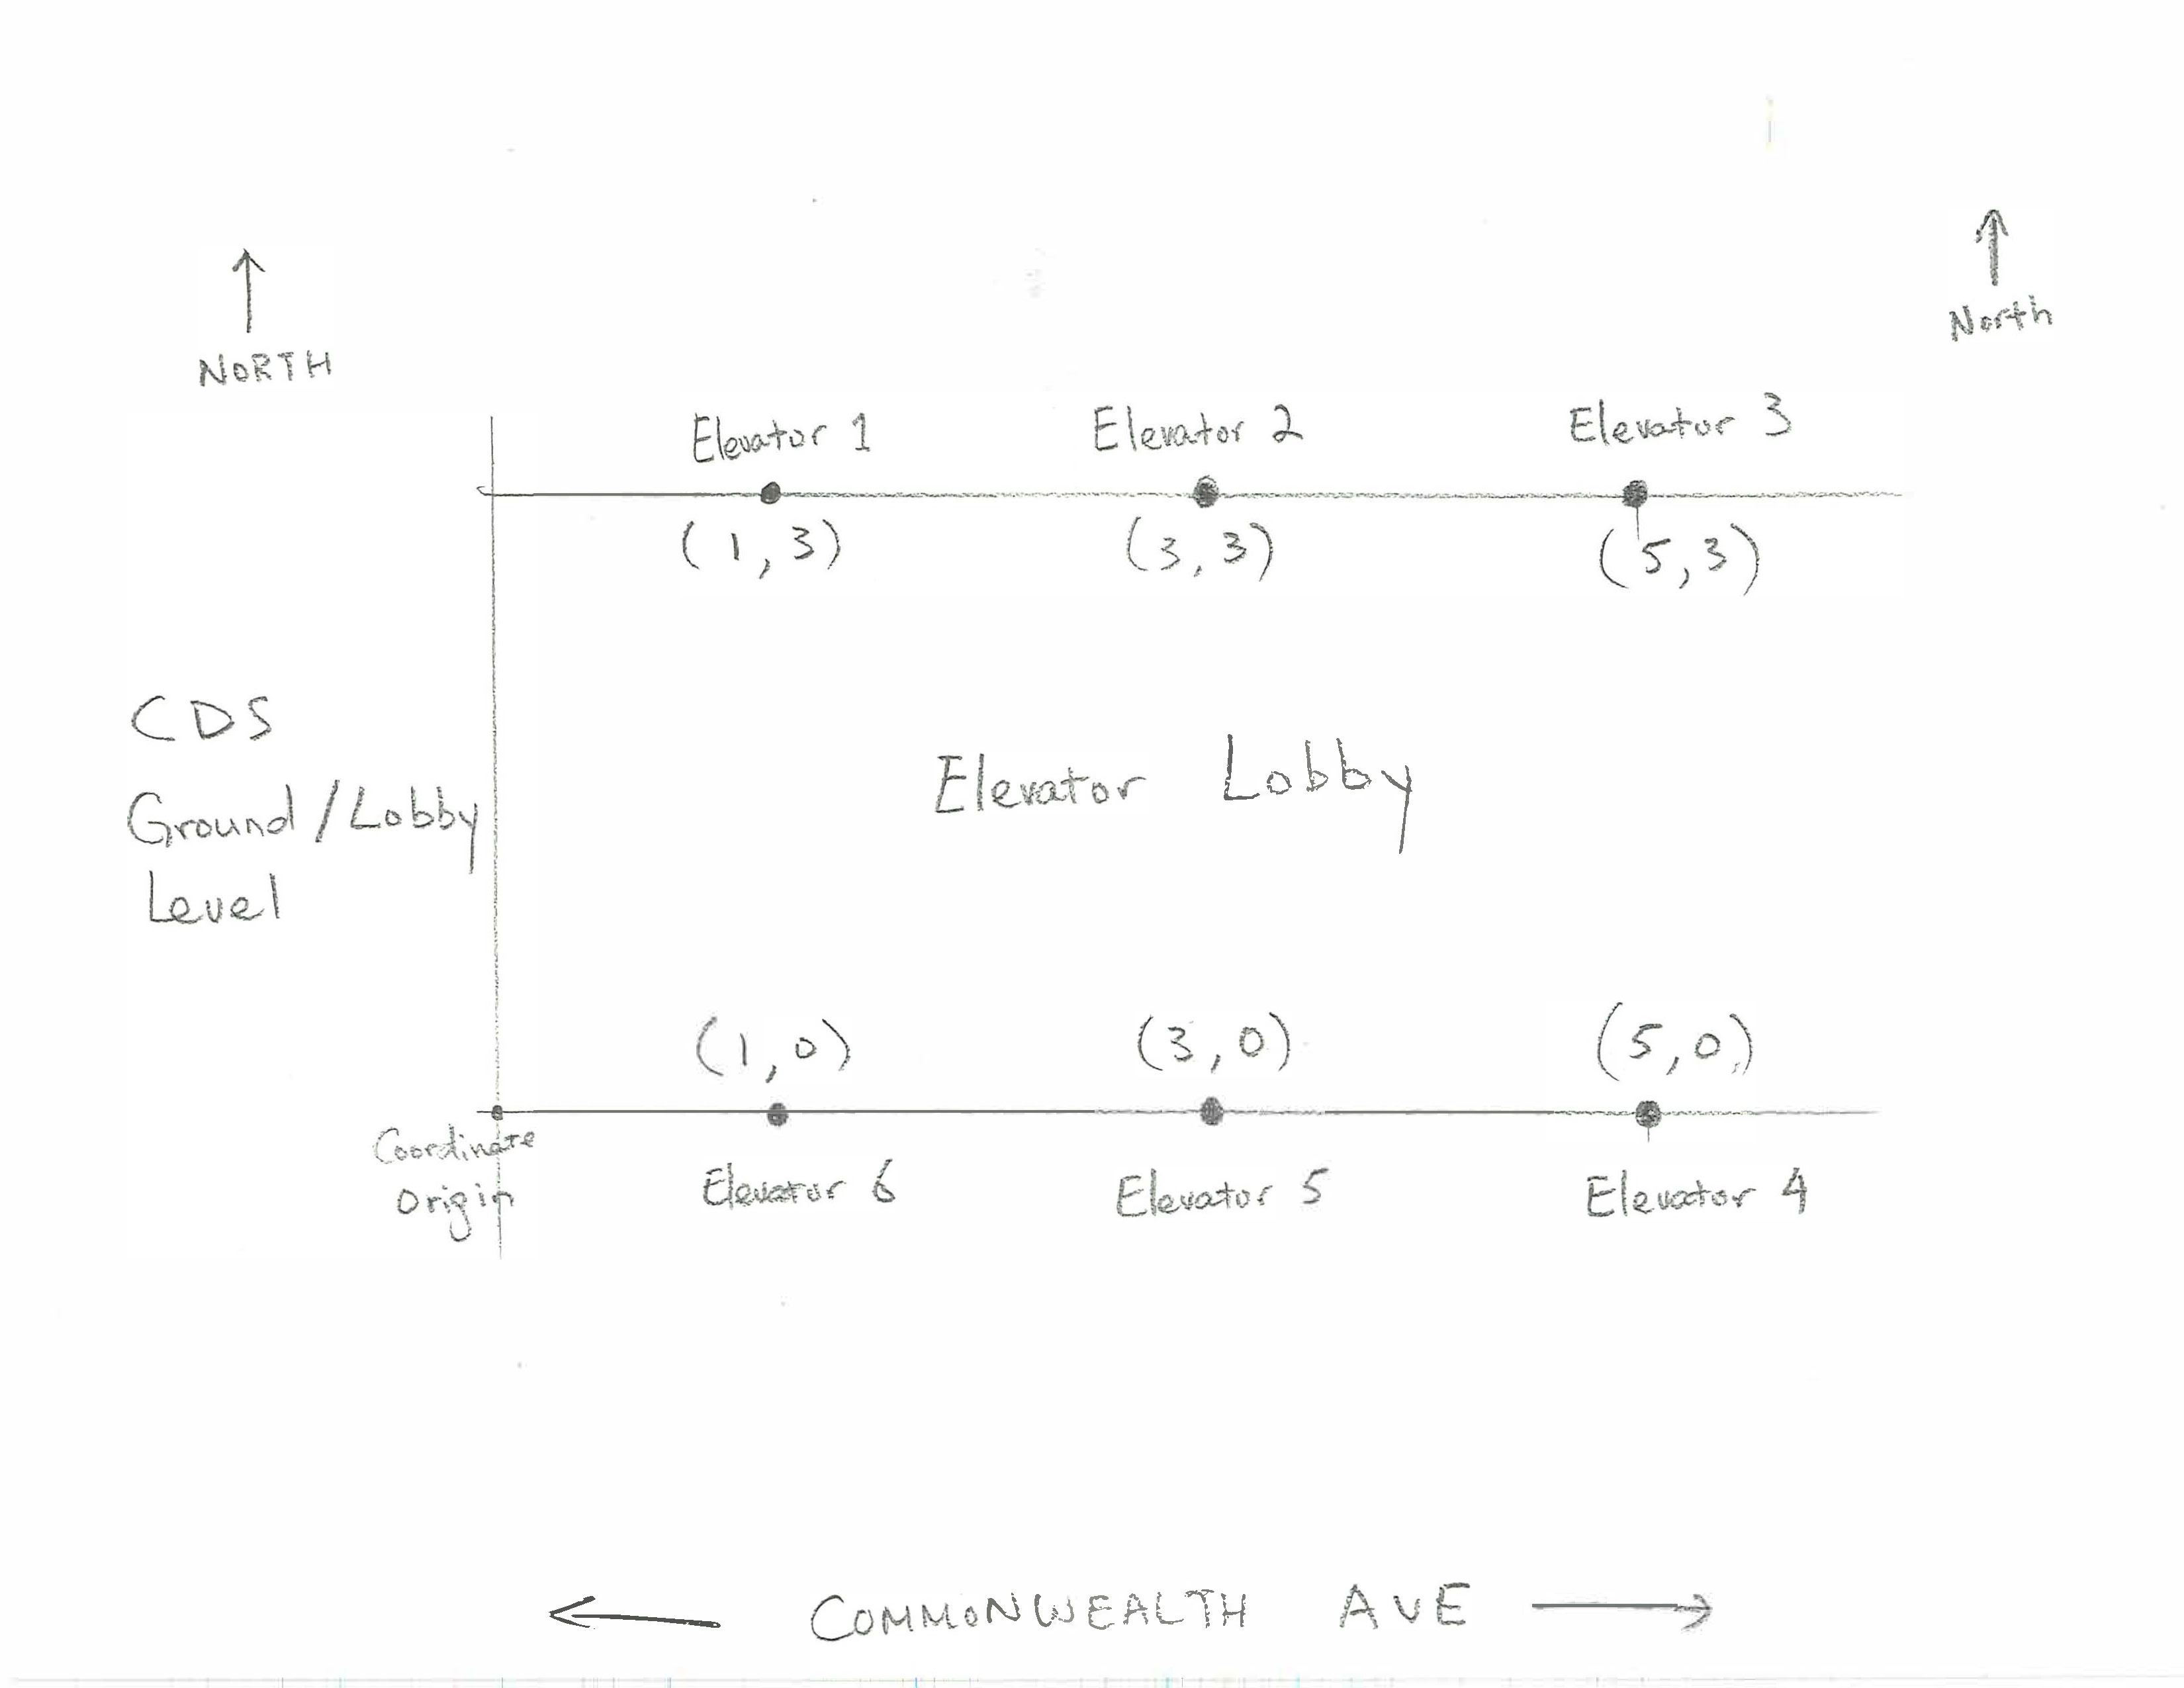

## Part 2: Determining the optimal place to stand

You can start this part after Tuesday 5 pm, when the last training data has been recorded. You are only allowed to use data from Monday 9/16 - Tuesday 9/17 for this part.

Please go to the google spreadsheet linked in the previous part and download the training data as a CSV file. Delete any rows that occur after 9/17. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

**Question 1**: According to the diagram of elevator locations above, where should you wait for an elevator to minimize expected
walking distance to the next elevator to arrive, assuming the next elevator to arrive has an equal chance to be any one of the 6 available elevators? Please express your answer using the coordinate system in the diagram. Briefly justify your answer.

**Answer:** 
coordinates:

For the X coordinate:
$$
x_{\text{center}} = \frac{x_1 + x_2 + x_3 + x_4 + x_5 + x_6}{6} = \frac{1 + 3 + 5 + 5 + 3 + 1}{6} = 3
$$

For the Y coordinate:
$$
y_{\text{center}} = \frac{y_1 + y_2 + y_3 + y_4 + y_5 + y_6}{6} = \frac{3 + 3 + 3 + 0 + 0 + 0}{6} = 1.5
$$

Thus, the optimal position to wait is at thetry of the elevator layout.
etry of the elevator layout.


**Question 2**: Use a plotting utility (e.g. `matplotlib.pyplot`) to plot the arrival times of elevators on the training data
(Monday 9/16 - Tuesday 9/17). The x-axis should be timestamp and the y-axis should be the elevator ID. I suggest using a scatter plot.
ChatGPT may be useful. Display the plot. List any observations
(e.g. cyclical patterns, some elevators arriving more frequently than others)

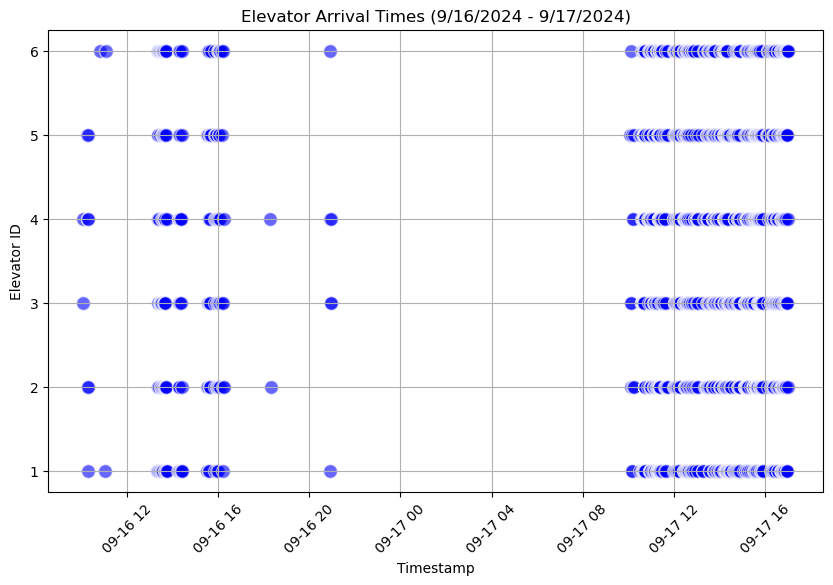

In [71]:
# Code for question 1:
import pandas as pd
import matplotlib.pyplot as plt

def make_plot():

    data = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 1.csv')
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])

    start_date = pd.Timestamp('2024-09-16')
    end_date = pd.Timestamp('2024-09-18')
    data_filtered = data[(data['Timestamp'] >= start_date) & (data['Timestamp'] < end_date)]

    plt.figure(figsize=(10, 6))
    plt.scatter(data_filtered['Timestamp'], data_filtered['Elevator ID'], alpha=0.6, c='blue', edgecolors='w', s=100)
    plt.title('Elevator Arrival Times (9/16/2024 - 9/17/2024)')
    plt.xlabel('Timestamp')
    plt.ylabel('Elevator ID')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

make_plot()


State observations here (briefly).

The peak of the elevators usage occurs on 9.17 morning. The distribution in each elevator turns to be even.

**Question 3**: Make a table listing the average *frequency*
for each elevator in arrivals per second.
Based on the table you made, do you think it is optimal
to wait in the location you answered for question 1? Explain why or why not. Note that you will need to process the data to take into account
gaps in the data collection. For example, if no one collected data for 1-2pm, you should subtract that from the total time.

In [68]:
# Write any data processing code you need here

## TODO # Convert the 'Timestamp' column to datetime format
def calculate_frequencies():
    data['Timestamp'] = pd.to_datetime(data['Timestamp'])
    
    start_date = pd.Timestamp('2024-09-16')
    end_date = pd.Timestamp('2024-09-18')
    data_filtered = data[(data['Timestamp'] >= start_date) & (data['Timestamp'] < end_date)]
    total_time_seconds = (data_filtered['Timestamp'].max() - data_filtered['Timestamp'].min()).total_seconds()
    arrivals_per_elevator = data_filtered['Elevator ID'].value_counts().sort_index()
    frequencies = arrivals_per_elevator / total_time_seconds

    result = pd.DataFrame({
        'Elevator ID': arrivals_per_elevator.index,
        'Total data collection time (seconds)': [total_time_seconds] * len(arrivals_per_elevator),
        'Number of arrivals': arrivals_per_elevator.values,
        'Average frequency (arrivals per second)': frequencies.values
    })

    print(result)

calculate_frequencies()

   Elevator ID  Total data collection time (seconds)  Number of arrivals  \
0            1                              111294.0                 155   
1            2                              111294.0                 162   
2            3                              111294.0                 170   
3            4                              111294.0                 168   
4            5                              111294.0                 167   
5            6                              111294.0                 159   

   Average frequency (arrivals per second)  
0                                 0.001393  
1                                 0.001456  
2                                 0.001527  
3                                 0.001510  
4                                 0.001501  
5                                 0.001429  


**Answer:** TODO

| Elevator ID | 1     | 2     | 3     | 4     | 5     | 6     |
| ----------- | ----- | ----- | ----- | ----- | ----- | ----- |
| Total data collection time (seconds) | 111294 | 111294 | 111294 | 111294 | 111294 | 111294 |
| Number of arrivals | 155   | 162   | 170   | 168   | 167   | 159   |
| Average frequency (arrivals per second) | 0.001393 | 0.001456 | 0.001527 | 0.001510 | 0.001501 | 0.001429 |

**Question 4** : Let's say I just arrived in the lobby and have no prior knowledge (e.g. which floor the elevators are currently on or which elevator was the last to arrive).
Using the results from question 3, determine the probability of each elevator being the next to arrive. Present these probabilities in a table and ensure they sum to one. Provide an intuitive explanation to support your answer.

**Answer:** TODO


For Elevator 1:
$P(\text{Elevator 1}) = \frac{155}{981} \approx 0.1580$

For Elevator 2:
$P(\text{Elevator 2}) = \frac{162}{981} \approx 0.1651$

For Elevator 3:
$P(\text{Elevator 3}) = \frac{170}{981} \approx 0.1732$

For Elevator 4:
$P(\text{Elevator 4}) = \frac{168}{981} \approx 0.1711$

For Elevator 5:
$P(\text{Elevator 5}) = \frac{167}{981} \approx 0.1701$

For Elevator 6:
$P(\text{Elevator 6}) = \frac{159}{981} \approx 0.1620$

| Elevator ID | 1 | 2 | 3 | 4 | 5 | 6 |
| ----------- | --- |--- |--- |--- |--- |--- |
| Probability of being next elevator to arrive | 0.1580 | 0.1651 | 0.1732 | 0.1711 | 0.1701 |0.1620 |

**Question 5**: Calculate the optimal location to wait for an elevator based on your answer to the previous question. Give your answer as a coordinate
using the coordinate system of the diagram at the beginning of this assignment. Justify your answer briefly.


**Answer:** TODO
We calculate the weighted geometric center of the elevator positions based on the probabilities calculated in Question 4.

For the $x$ coordinate:
$x_{\text{center}} = (1 \times 0.1580) + (3 \times 0.1651) + (5 \times 0.1732) + (5 \times 0.1711) + (3 \times 0.1701) + (1 \times 0.1620) = 3.0471$

For the $y$ coordinate:
$y_{\text{center}} = (3 \times 0.1580) + (3 \times 0.1651) + (3 \times 0.1732) + (0 \times 0.1711) + (0 \times 0.1701) + (0 \times 0.1620) = 1.4889$

Thus, the optimal location to wait is at the coordinates $(3.05, 1.49)$.


\textbf{Explanation:} The optimal waiting position is slightly closer to the elevators that have higher probabilities of arriving next (Elevators 3, 4, and 5). This location minimizes the expected walking distance to the next arriving elevator, based on the historical frequency of arrivals.

**Question 6**: On the training data, calculate the average distance traveled to the next elevator arrival if I wait at the location specified in question 1.
Then, calculate the average distance traveled if I wait at the location specified in question 5.

*Your answer to question 5 should result in a shorter average distance traveled.*

You are free to write your own code for these calculations, but we recommend implementing a function called `get_average_walk_distance(data, coordinate)`, since you will need to reuse this function.



In [1]:
# Your code here

import pandas as pd
import numpy as np

elevator_coords = {
    1: (1, 3),
    2: (3, 3),
    3: (5, 3),
    4: (5, 0),
    5: (3, 0),
    6: (1, 0)
}

def get_average_walk_distance(data, waiting_point):
    total_distance = 0
    total_arrivals = len(data)
    
    for _, row in data.iterrows():
        elevator_id = row['Elevator ID']
        elevator_pos = elevator_coords[elevator_id]
        distance = np.hypot(elevator_pos[0] - waiting_point[0], elevator_pos[1] - waiting_point[1])
        total_distance += distance
    
    average_distance = total_distance / total_arrivals
    return average_distance

data = pd.read_csv('CDS Elevator Arrivals (Responses) - Form Responses 1.csv')
data['Timestamp'] = pd.to_datetime(data['Timestamp'])

start_date = pd.Timestamp('2024-09-16')
end_date = pd.Timestamp('2024-09-18')
training_data = data[(data['Timestamp'] >= start_date) & (data['Timestamp'] < end_date)]

validation_data = data[data['Timestamp'] >= end_date]

position_q1 = (3, 1.5)  # Geometric center from Question 1
average_distance_q1_train = get_average_walk_distance(training_data, position_q1)
average_distance_q1_val = get_average_walk_distance(validation_data, position_q1)

position_q5 = (3.05, 1.49)  # Weighted center from Question 5
average_distance_q5_train = get_average_walk_distance(training_data, position_q5)
average_distance_q5_val = get_average_walk_distance(validation_data, position_q5)

print(f"Training set from Question 1: {average_distance_q1_train:.4f}")
print(f"Training set Question 5: {average_distance_q5_train:.4f}")
print(f"Validation set Question 1: {average_distance_q1_val:.4f}")
print(f"Validation set - Average Question 5: {average_distance_q5_val:.4f}")


Training set from Question 1: 2.1646
Training set Question 5: 2.1640
Validation set Question 1: 2.1638
Validation set - Average Question 5: 2.1635


**Answer:** The new distance is a little bit shorter.

## Part 3: Testing on evaluation data

You can start this part after Thursday 5 pm, when the last test data has been recorded.

Please go to the google spreadsheet linked in part 1 and download the data as a CSV file. Delete any rows that occurred before 9/18, since we used this for training already. If you are working in Google Colab, you can upload the CSV to the server using the panel on the left.

Use the `get_average_walk_distance` function you wrote for Part 2 Question 6 to calculate the average distance traveled to the next elevator arrival on the test data for both the coordinate specified in question 1 and the coordinate specified in question 5. Then, organize the numbers using the following table:

|Average Distance Walked (m) | Training Data | Test Data |
|----------------------------|---------------|-----------|
|Naive position (Question 1) | 2.1646|   2.1638 |
|Smart position (Question 5) | 2.1640 |   2.1635 |

Did you succeed in finding a good location to wait for the elevators? If not, explain what might have gone wrong.

**Answer:** Suceed